In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import pathlib
import glob
import os 
import seaborn as sns
import scipy
import rpy2
from matplotlib import pyplot as plt
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt

In [10]:
sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.figdir = '/project/data/gew123/Prelim_Plots'
sc.settings.set_figure_params(dpi=80, facecolor='white', dpi_save=400)

figures_path = '/project/data/gew123/Dataset_Plots'

scanpy==1.9.6 anndata==0.10.3 umap==0.5.4 numpy==1.23.4 scipy==1.12.0 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.8 pynndescent==0.5.11


In [3]:
# Read in data
processed_data = '/project/data/gew123/Processed_h5ad'

jansky = sc.read_h5ad(f'{processed_data}/Jansky_processed.h5ad')
kildesiute = sc.read_h5ad(f'{processed_data}/Kildesiute_processed.h5ad')
slyper = sc.read_h5ad(f'{processed_data}/Slyper_processed.h5ad')
verhoeven = sc.read_h5ad(f'{processed_data}/Verhoeven_processed.h5ad')
wienke = sc.read_h5ad(f'{processed_data}/Wienke_processed.h5ad')
yuan = sc.read_h5ad(f'{processed_data}/Yuan_processed.h5ad')

In [4]:
datasets = [jansky, kildesiute, slyper, verhoeven, wienke, yuan]
sources = ['Jansky', 'Kildesiute', 'Slyper', 'Verhoeven', 'Wienke', 'Yuan']

In [5]:
# Check counts
for index, source in enumerate(datasets):
    print(sources[index],':', source.n_obs)

Jansky : 64769
Kildesiute : 19723
Slyper : 20321
Verhoeven : 74514
Wienke : 932
Yuan : 4407


In [6]:
# Calculate QC metrics for each dataset
for adata in datasets:
    sc.pp.calculate_qc_metrics(adata, inplace=True)

In [7]:
# Create an empty list to store dataframes
df_list = []

# Loop over each dataset and extract metrics
for index, adata in enumerate(datasets):
    df = adata.obs[['total_counts', 'n_genes_by_counts']].copy()
    df['dataset'] = f'{sources[index]}'  # Add a column to identify the dataset
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)


/tmp/ipykernel_1486247/3779660272.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='dataset', y='total_counts', data=combined_df, inner='quartile', palette='Set2')


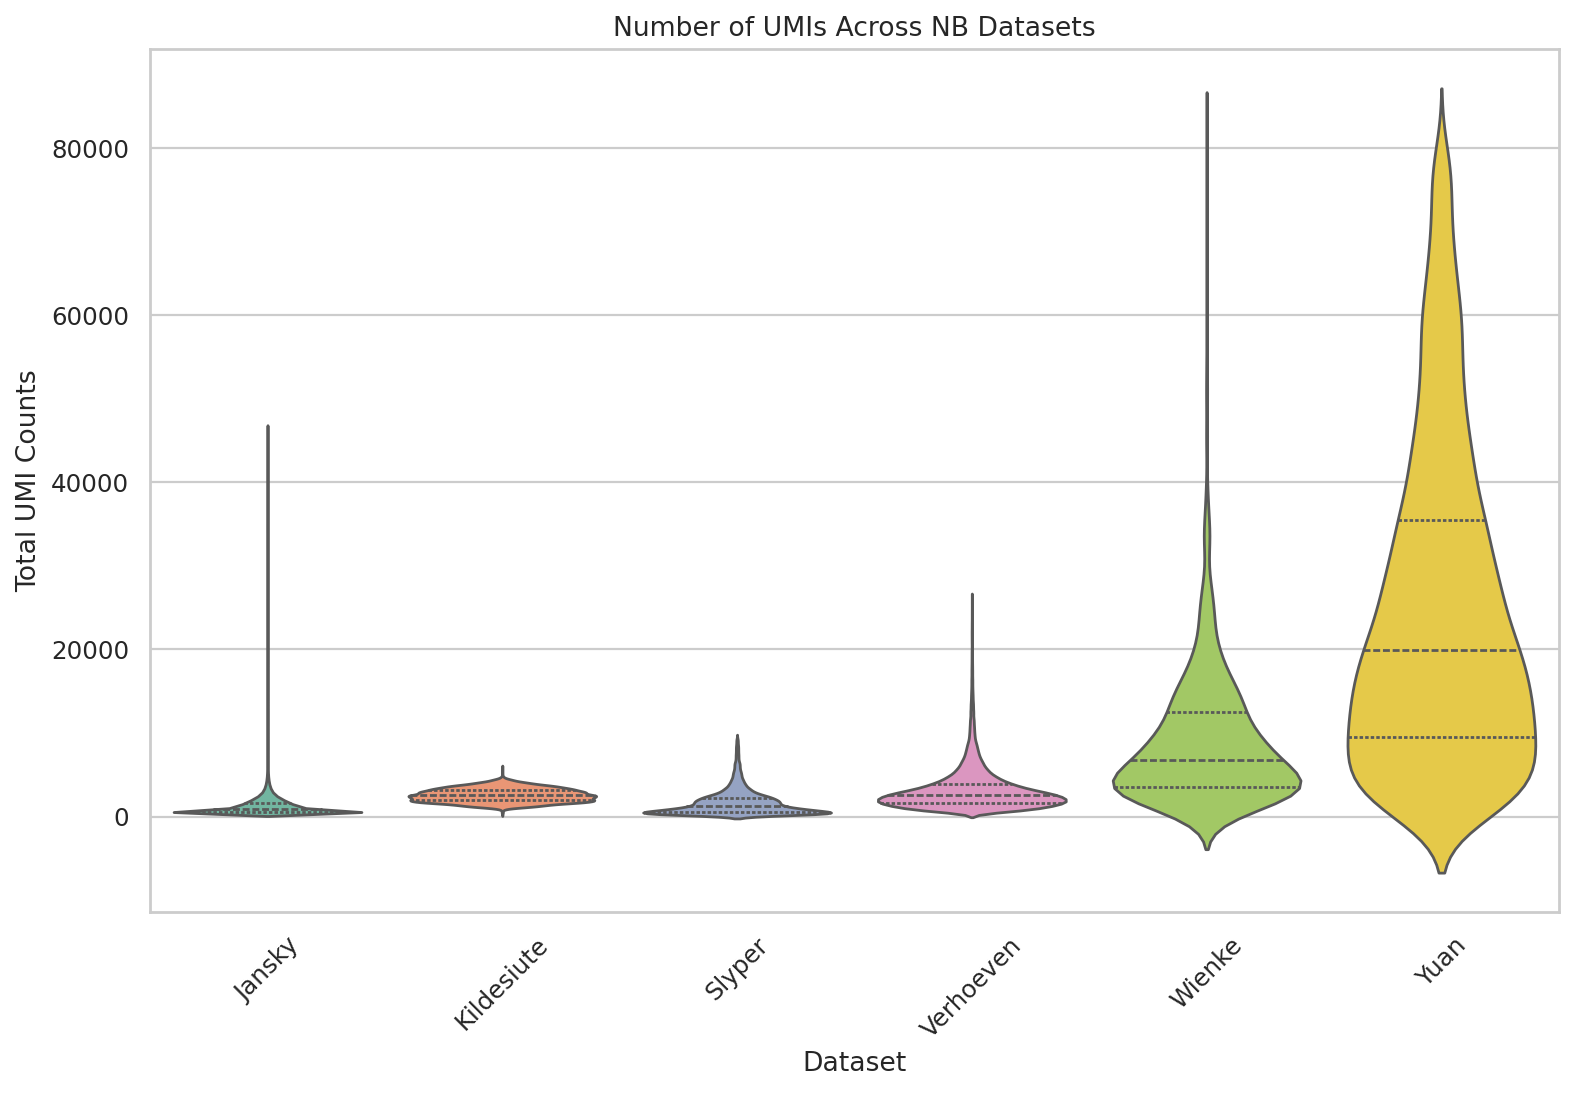

/tmp/ipykernel_1486247/3779660272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='dataset', y='n_genes_by_counts', data=combined_df, inner='quartile', palette='Set2')


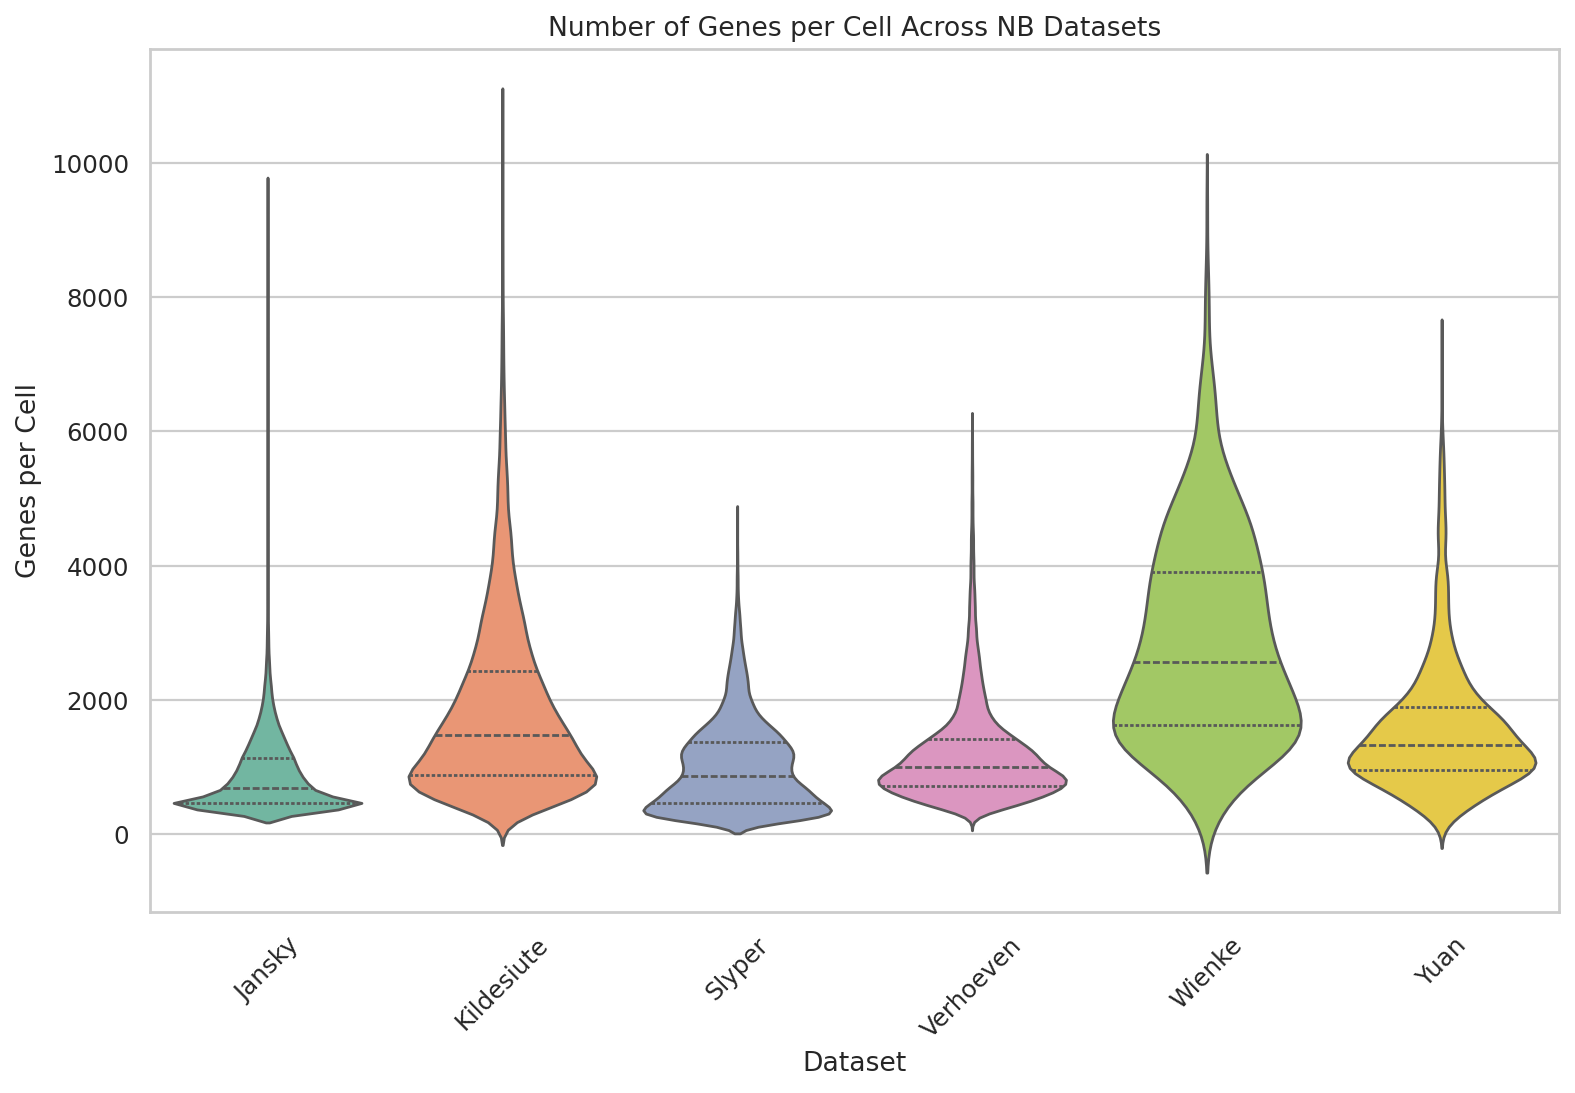

In [65]:
# Plotting UMI and gene per cell violin plots

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the violin plot for total_counts
plt.figure(figsize=(10, 7))
sns.violinplot(x='dataset', y='total_counts', data=combined_df, inner='quartile', palette='Set2')
plt.title('Number of UMIs Across NB Datasets')
plt.xlabel('Dataset')
plt.ylabel('Total UMI Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{figures_path}/UMI_violin_plot.png', bbox_inches='tight')
plt.show()


# Create the violin plot for n_genes_by_counts
plt.figure(figsize=(10, 7))
sns.violinplot(x='dataset', y='n_genes_by_counts', data=combined_df, inner='quartile', palette='Set2')
plt.title('Number of Genes per Cell Across NB Datasets')
plt.xlabel('Dataset')
plt.ylabel('Genes per Cell')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{figures_path}/gene_violin_plot.png', bbox_inches='tight')
plt.show()

In [13]:
for i in datasets:
    del i

In [12]:
# Plot total cells per sample
adata = sc.read_h5ad('/project/data/gew123/Integration/Merged_Processed_NB.h5ad')

In [16]:
# Read in CTRL object
adata = sc.read_h5ad('/project/data/gew123/Integration/Merged_Processed_CTRL.h5ad')

In [20]:
adata.obs

,source,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier
AAACCTGAGCAATATG_1,Jansky,NB,1165,7.061334,1706.0,7.442493,19.460727,0.0,0.000000,0.000000,39.0,3.688879,2.286049,0.0,0.000000,0.000000,False
AAACCTGAGCGCTTAT_1,Jansky,NB,901,6.804615,1225.0,7.111512,17.142857,2.0,1.098612,0.163265,53.0,3.988984,4.326531,0.0,0.000000,0.000000,False
AAACCTGAGGCACATG_1,Jansky,NB,1414,7.254885,2027.0,7.614805,13.616182,2.0,1.098612,0.098668,52.0,3.970292,2.565368,0.0,0.000000,0.000000,False
AAACCTGAGTGGCACA_1,Jansky,NB,1051,6.958448,1392.0,7.239215,14.224138,2.0,1.098612,0.143678,50.0,3.931826,3.591954,0.0,0.000000,0.000000,False
AAACCTGAGTTCGCAT_1,Jansky,NB,958,6.865891,1364.0,7.218910,18.035191,5.0,1.791759,0.366569,46.0,3.850148,3.372434,1.0,0.693147,0.073314,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGGTCTGGA-1-10,Kameneva_CTRL,Control,2371,7.771489,6142.0,8.723069,13.025073,240.0,5.484797,3.907522,1054.0,6.961296,17.160534,72.0,4.290459,1.172257,False
TTTGGTTGTCGTTCAA-1-10,Kameneva_CTRL,Control,3193,8.069029,8175.0,9.008958,13.174312,211.0,5.356586,2.581040,1433.0,7.268223,17.529052,40.0,3.713572,0.489297,False
TTTGTTGAGCTATCCA-1-10,Kameneva_CTRL,Control,2072,7.636752,5276.0,8.571113,17.494314,145.0,4.983607,2.748294,1155.0,7.052721,21.891585,27.0,3.332205,0.511751,False
TTTGTTGCAAGCTGCC-1-10,Kameneva_CTRL,Control,2357,7.765569,6686.0,8.807921,29.584206,288.0,5.666427,4.307508,851.0,6.747587,12.728089,1292.0,7.164720,19.323961,False


In [21]:
# Get dataset labels
dataset_labels = adata.obs['source']

# Get dataset cell counts
cell_counts = dataset_labels.value_counts().sort_index()

In [22]:
cell_counts

Jansky              64763
Jansky_CTRL        100166
Kameneva_CTRL       59830
Kildesiute          19723
Kildesiute_CTRL     47317
Slyper              20321
Verhoeven           74360
Wienke                900
Yuan                 3653
Name: source, dtype: int64

In [23]:
# Convert the cell counts to a DataFrame for easier manipulation
cell_counts_df = cell_counts.reset_index()
cell_counts_df.columns = ['Dataset', 'Cell Count']

In [24]:
# Separate control and non-control datasets
non_ctrl_df = cell_counts_df[~cell_counts_df['Dataset'].str.endswith('_CTRL')]
ctrl_df = cell_counts_df[cell_counts_df['Dataset'].str.endswith('_CTRL')]

# Concatenate non-control datasets with control datasets
ordered_cell_counts_df = pd.concat([non_ctrl_df, ctrl_df])

In [25]:
ordered_cell_counts_df

,Dataset,Cell Count
0,Jansky,64763
3,Kildesiute,19723
5,Slyper,20321
6,Verhoeven,74360
7,Wienke,900
8,Yuan,3653
1,Jansky_CTRL,100166
2,Kameneva_CTRL,59830
4,Kildesiute_CTRL,47317


In [26]:
ordered_cell_counts_df.reset_index()

ordered_datasets = ordered_cell_counts_df['Dataset'].tolist()

/tmp/ipykernel_1486247/2856514482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dataset', y='Cell Count', data=ordered_cell_counts_df, palette='husl',


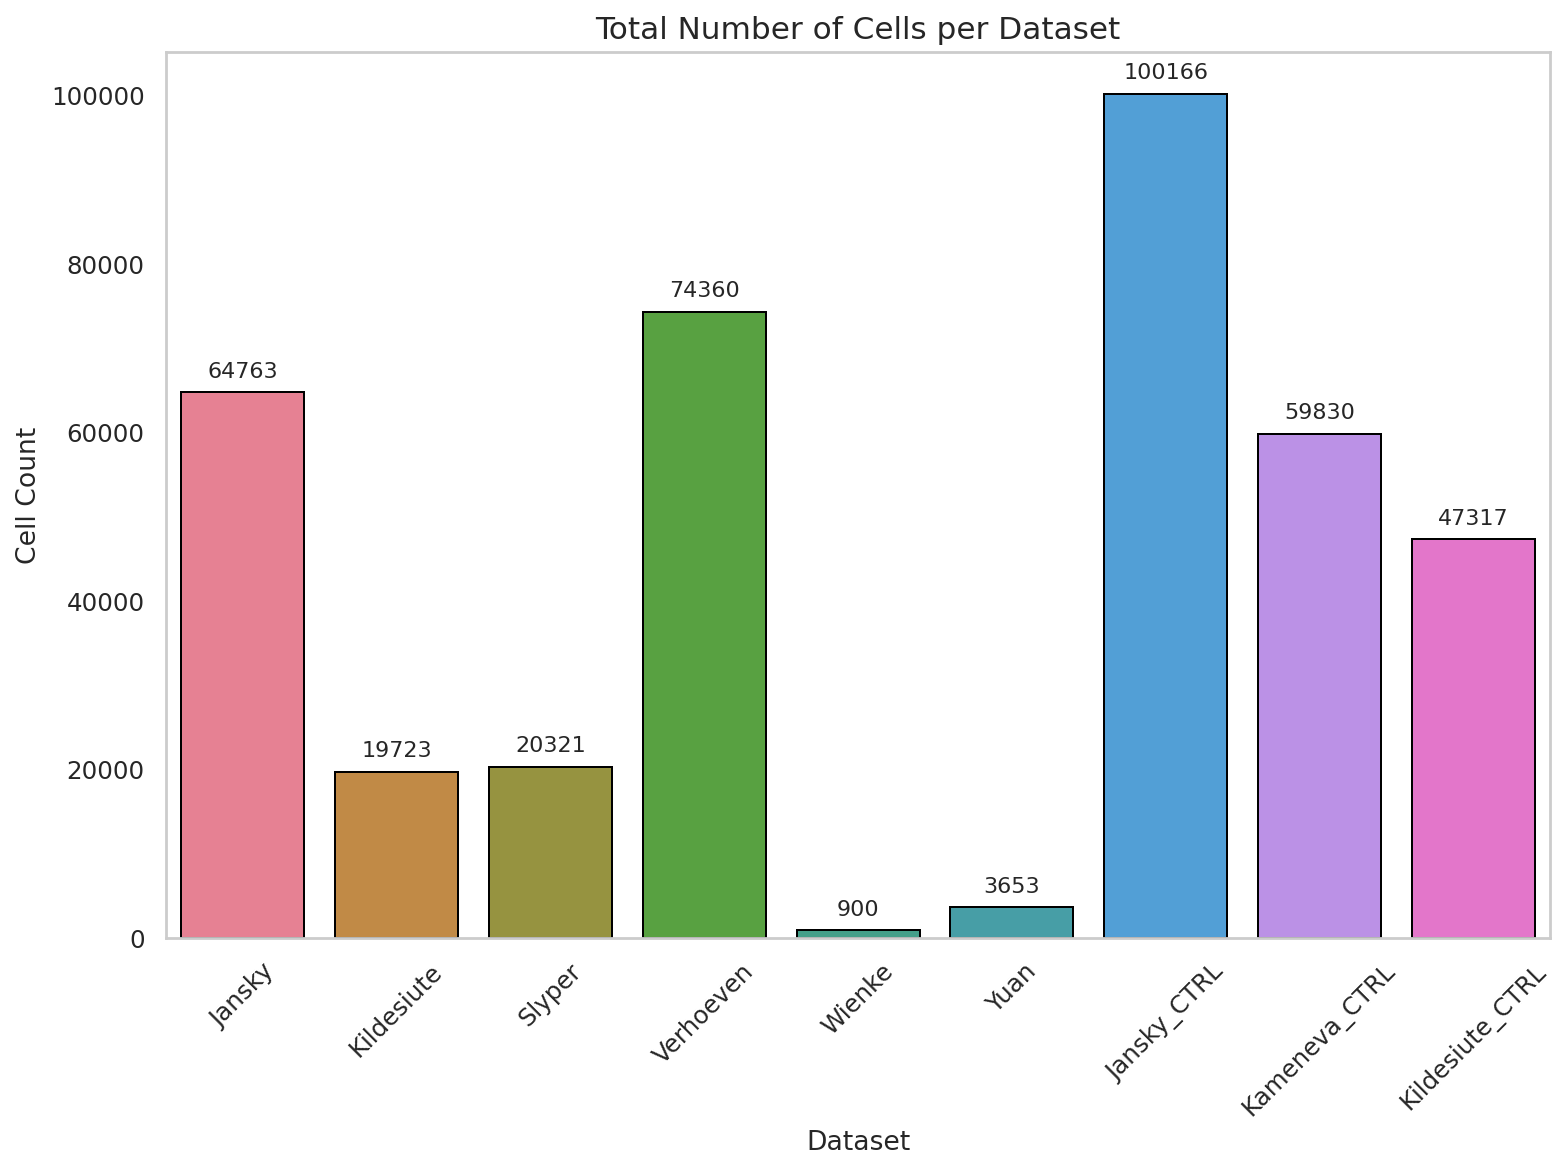

In [64]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the bar graph using Seaborn
plt.figure(figsize=(10, 7.5))

ax = sns.barplot(x='Dataset', y='Cell Count', data=ordered_cell_counts_df, palette='husl', 
            order=ordered_datasets, errorbar=None, linewidth=1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=5)

for bar in ax.patches:  # `ax.patches` gives you access to the individual bars
    bar.set_edgecolor('black')  # Set the edge color to black
    bar.set_linewidth(0.9)    

plt.title('Total Number of Cells per Dataset', fontsize=14)
plt.xlabel('Dataset')
plt.ylabel('Cell Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

# Save the plot
plt.savefig("cell_counts_per_dataset_barplot.png", bbox_inches='tight', dpi=600)
# Show the plot
plt.show()

